# Load Dataset

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:

In [ ]:
!pip install -q kaggle

Choose the kaggle.json file that you downloaded

In [ ]:
from google.colab import files
files.upload()

{}

Make directory named kaggle and copy kaggle.json file there.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

Change the permissions of the file.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


You can check if everything's okay by running this command.

In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


Download data

In [ ]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!mkdir titanic_dataset

In [ ]:
!unzip titanic.zip -d titanic_dataset

unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Titanic dataset
titanic = pd.read_csv('/train.csv')


In [ ]:
# Basic dataset information
print("Dataset Shape:", titanic.shape)

Dataset Shape: (891, 12)


In [ ]:
print("\nColumn Names:")
print(titanic.columns.tolist())


Column Names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
print("\nFirst 5 rows:")
print(titanic.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

# Missing Data Analysis


In [ ]:
# Check for missing values
print("Missing Values Summary:")
missing_data = titanic.isnull().sum()
missing_percent = (missing_data / len(titanic)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])

Missing Values Summary:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


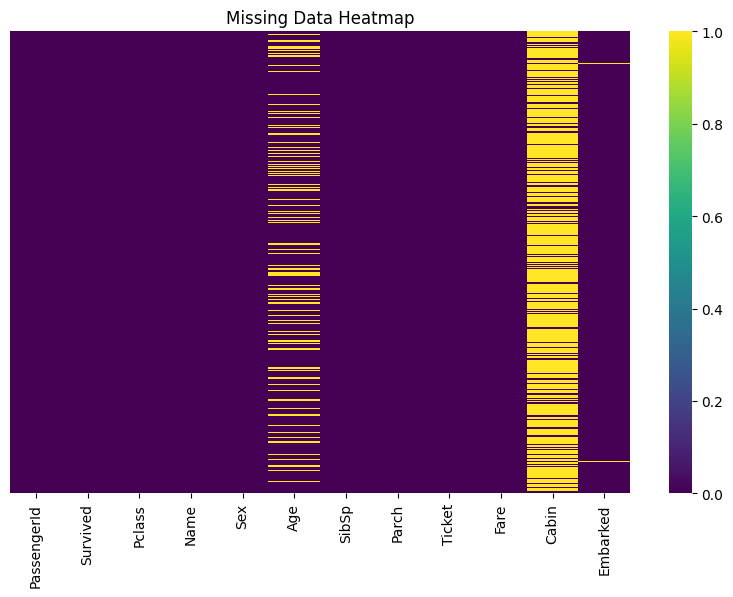

In [ ]:
# Visualize missing data patterns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## 📊 **What This Chart Shows**

* This is a **missing data heatmap**, often created with Seaborn’s `heatmap()` in Python.
* Each column represents a feature (variable) in your dataset.
* Each row represents a record (one passenger).
* The color indicates whether data is **present** or **missing**:

  * **Dark purple (0.0 on the scale)**: No missing data (value exists).
  * **Bright yellow (1.0 on the scale)**: Missing data (NaN or null).

---

## 🧭 **How to Interpret Heatmap**

Let's go column by column:

✅ **Columns with little or no missing data (almost all dark purple):**

* PassengerId
* Survived
* Pclass
* Name
* Sex
* SibSp
* Parch
* Ticket
* Fare
* Embarked

These columns are largely complete.

⚠️ **Columns with visible yellow lines (missing values):**

* **Age**: Many yellow lines—this indicates that quite a few rows are missing Age.
* **Cabin**: Almost solid yellow—this means **most Cabin values are missing**.

---

## 🔍 **Key Observations**

1. **Age column:**

   * Lots of yellow streaks scattered—many passengers have no recorded age.
2. **Cabin column:**

   * Almost completely yellow—most entries are missing (common in Titanic datasets).

3. **Embarked column:**

   * Very few (or no) missing values.

---

## 🎯 **How to Use This Information**

* Decide on **data cleaning strategies**:

  * For **Cabin**, you might drop the column or create a “HasCabin” flag instead.
  * For **Age**, you could impute missing values (e.g., median or based on Pclass).
  * For columns with negligible missing data, you can drop those rows or fill them.

---

✅ **Quick Summary of the Heatmap:**

* **Mostly complete dataset**, except:

  * **Age**: many missing values.
  * **Cabin**: heavily missing.
  * **Fare**: a few missing.


# Data Types and Structure Analysis

In [ ]:
# Examine data types
print("\nData Types:")
print(titanic.dtypes)


Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


This Python code block analyzes **object-type columns** in the DataFrame. Here's a line-by-line explanation:

---

### 🧠 **Purpose of the Code:**

To **examine object columns** (typically containing strings or mixed types) in the `titanic` DataFrame by:

* Printing how many **unique values** each object column has.
* Displaying a few **sample (non-null) values** to check for **inconsistencies or mixed types**.

---

### 🔍 **Line-by-Line Breakdown:**

```python
# Check for mixed data types in object columns
print("\nObject Columns Analysis:")
```

* Prints a title to indicate you're starting analysis of object-type columns.

---

```python
for col in titanic.select_dtypes(include=['object']).columns:
```

* This line **iterates through all columns** in the DataFrame where the data type is `object` (typically strings, but sometimes mixed with numbers, dates, etc.).
* `select_dtypes(include=['object'])` filters only object-type columns.

---

```python
    print(f"\n{col}:")
```

* Prints the name of the current object column being analyzed.

---

```python
    print(f"  Unique values: {titanic[col].nunique()}")
```

* `nunique()` returns the number of **distinct non-null values** in that column.
* Helps identify whether a column has high cardinality (many distinct values), which might need cleaning or encoding for ML.

---

```python
    print(f"  Sample values: {titanic[col].dropna().unique()[:5]}")
```

* `dropna()` removes any `NaN` values.
* `unique()` gives an array of all unique values in the column.
* `[:5]` shows just the **first 5 unique values** to get a quick look at the kind of data stored.
* Helps detect **inconsistencies**, such as:

  * `"male"` vs `"Male"` (case issues)
  * `"S"` vs `" s "` (extra whitespace)
  * numbers mixed with strings

### ✅ **Why It’s Useful**

* Quickly identifies columns that may need:

  * **Standardization** (e.g., consistent casing)
  * **Encoding** (for ML)
  * **Cleaning** (e.g., removing whitespace)
* Prevents errors when preprocessing or modeling.


In [ ]:
# Check for mixed data types in object columns
print("\nObject Columns Analysis:")
for col in titanic.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(f"  Unique values: {titanic[col].nunique()}")
    print(f"  Sample values: {titanic[col].dropna().unique()[:5]}")



Object Columns Analysis:

Name:
  Unique values: 891
  Sample values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']

Sex:
  Unique values: 2
  Sample values: ['male' 'female']

Ticket:
  Unique values: 681
  Sample values: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']

Cabin:
  Unique values: 147
  Sample values: ['C85' 'C123' 'E46' 'G6' 'C103']

Embarked:
  Unique values: 3
  Sample values: ['S' 'C' 'Q']


# Duplicate Records Detection

In [ ]:
# Check for duplicate records
print(f"\nDuplicate Records: {titanic.duplicated().sum()}")


Duplicate Records: 0


In [ ]:
# Check for duplicates based on specific columns
subset_cols = ['Name', 'Age', 'Ticket', 'Fare']
print(f"Duplicates based on key columns: {titanic.duplicated(subset=subset_cols).sum()}")


Duplicates based on key columns: 0


# Outlier Detection (Numerical Columns)

In [ ]:
# Statistical summary for numerical columns
print("\nNumerical Columns Summary:")
numerical_cols = titanic.select_dtypes(include=[np.number]).columns
print(titanic[numerical_cols].describe())


Numerical Columns Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 🧭 **How to Read This Table**

**Rows** = summary statistics
**Columns** = each numerical variable

Each cell shows that statistic *computed* for that column.

---

### 📊 **Column-by-Column Explanation**

Let’s walk through the columns one at a time:

---

### 1️⃣ `PassengerId`

* Just a unique identifier for each passenger.
* **Min = 1, Max = 891**, so there are 891 passengers.

---

### 2️⃣ `Survived`

* Target variable: 0 = Died, 1 = Survived.
* **Mean = 0.3838**, so about **38% survived**.
* **Min = 0, Max = 1**, confirming binary values.

---

### 3️⃣ `Pclass`

* Passenger class (1st, 2nd, 3rd).
* **Mean = 2.3086**, showing more passengers were in lower classes.
* **Min = 1, Max = 3**.

---

### 4️⃣ `Age`

* **Count = 714**, which is **less than 891**, indicating **177 missing ages**.
* **Mean = \~29.7 years**.
* **Std = 14.5**, ages widely spread.
* **Min = 0.42**, the youngest passenger.
* **Max = 80**.

---

### 5️⃣ `SibSp`

* Number of siblings/spouses aboard.
* **Mean = 0.52**, most passengers had **0 or 1 sibling/spouse**.
* **Max = 8**, indicating some large families.

---

### 6️⃣ `Parch`

* Number of parents/children aboard.
* **Mean = 0.38**, most had **no parents/children with them**.
* **Max = 6**.

---

### 7️⃣ `Fare`

* Ticket price paid.
* **Mean = 32.20**, but:

  * **Std = 49.69**, meaning fares varied *hugely*.
  * **Min = 0**, free ticket.
  * **Max = 512.33**, very expensive ticket (1st class).
  * **Median (50%) = 14.45**, much lower than the mean (suggests skew).

---

### 📑 **What the Rows Mean**

| Row       | Meaning                     |
| --------- | --------------------------- |
| **count** | Number of non-null entries  |
| **mean**  | Average value               |
| **std**   | Standard deviation (spread) |
| **min**   | Minimum value               |
| **25%**   | 25th percentile (Q1)        |
| **50%**   | Median                      |
| **75%**   | 75th percentile (Q3)        |
| **max**   | Maximum value               |

---

### ✅ **Key Insights**

* **Missing Data:** `Age` has missing values (count < 891).
* **Fare Skewed:** Mean > Median, suggesting outliers (very high fares).
* **Survival Rate:** \~38% survived.
* **Most Passengers:** Were in 3rd class (median Pclass = 3).
* **SibSp and Parch:** Most people traveled alone or with 1 relative.


Consider about the **Age** data:

---

✅ **1️⃣ Standard Deviation (Std = 14.5)**

* **Standard deviation** measures how *spread out* the ages are around the **mean** (average age = \~29.7).
* **Interpretation:**

  * A standard deviation of 14.5 is quite large relative to the mean (14.5 / 29.7 ≈ 0.49), meaning ages vary a lot.
  * Ages range from babies to elderly people.
* **Rough rule of thumb:**

  * \~68% of ages are within **mean ± 1 std**, i.e.,

    * 29.7 - 14.5 ≈ **15**
    * 29.7 + 14.5 ≈ **44**
  * So about 68% of passengers were between \~15 and \~44 years old.

---

✅ **2️⃣ Minimum Age (Min = 0.42)**

* This means the **youngest passenger was just 0.42 years old**, which is about **5 months old**.
* Confirms there were infants aboard the Titanic.

---

🔍 **Putting these together:**

* **Ages ranged widely** (from \~0.4 to 80).
* **Many adults in their 20s-40s**, but also infants and elderly.
* The high standard deviation reflects this diversity.

---

✅ **Tip for Data Processing:**

* Because of this spread, sometimes analysts **bin ages** into categories (child, adult, senior) or **scale them** before modeling.
* Also, you should decide how to **impute missing ages** (since 177 ages are missing).

If you’d like, I can help you visualize the age distribution or suggest imputation strategies!


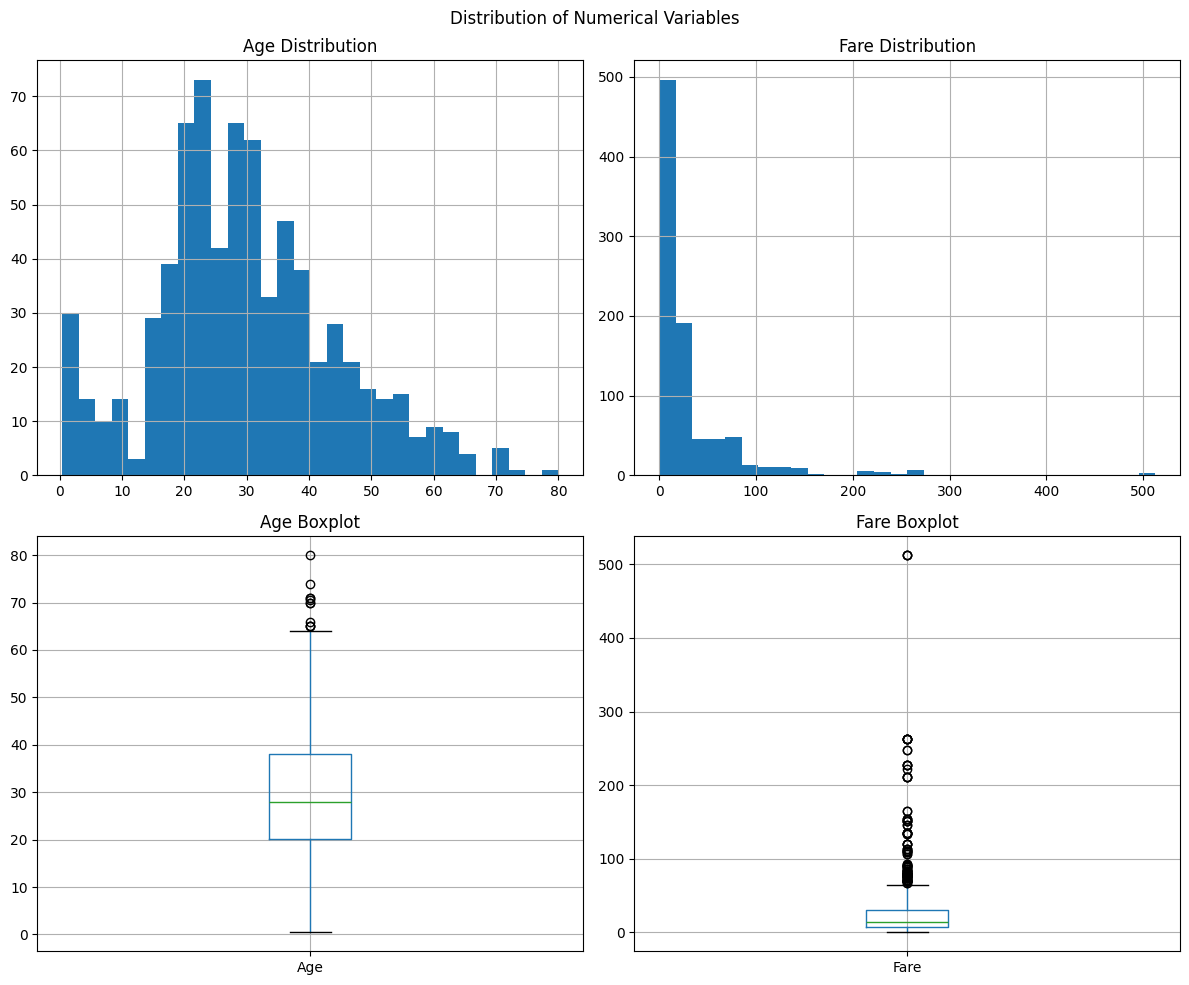

In [ ]:
# Visualize distributions to spot outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Numerical Variables')

titanic['Age'].hist(bins=30, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

titanic['Fare'].hist(bins=30, ax=axes[0,1])
axes[0,1].set_title('Fare Distribution')

titanic.boxplot(column='Age', ax=axes[1,0])
axes[1,0].set_title('Age Boxplot')

titanic.boxplot(column='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Boxplot')

plt.tight_layout()
plt.show()

### 🔹 Top Row: Histograms (Distribution Plots)

#### **1. Age Distribution (Top-Left)**

* Shows a histogram of passenger ages.
* The distribution is **right-skewed** with a peak between ages **20 to 30**.
* There is a **noticeable dip** around ages 10-15 and some multimodal characteristics.
* Few passengers are under 5 or over 70 years old.

#### **2. Fare Distribution (Top-Right)**

* Histogram of ticket fares paid by passengers.
* This distribution is **heavily right-skewed**.
* Most fares are concentrated below **100**, with **a long tail** extending to over **500**.
* Indicates a few passengers paid **extremely high fares**, which may be outliers.

---

### 🔹 Bottom Row: Boxplots

#### **3. Age Boxplot (Bottom-Left)**

* Displays the summary of age data:

  * **Median age** around **27-28 years**.
  * **Interquartile range (IQR)**: \~20 to \~37 years. (https://www.scribbr.com/statistics/interquartile-range/)
  * Outliers are shown above \~65 years.

#### **4. Fare Boxplot (Bottom-Right)**

* Fare values have a **much wider spread**:

  * **Median fare** appears to be around **20-25**.
  * The box is very compressed (indicating a dense central mass), while the **outliers dominate** the visualization.
  * There are **many extreme outliers**, reaching over **500**.

---

### 🧠 Interpretation:

* **Age** distribution is somewhat normal but skewed slightly right, with a large concentration of people in their 20s and 30s.
* **Fare** is highly skewed and has many outliers, suggesting it may benefit from transformation (e.g., log-scaling) before modeling.
* Boxplots confirm that **Fare** has more extreme values than **Age**, which will influence analyses sensitive to outliers (e.g., linear models).
* These plots are useful to:

  * Detect anomalies or outliers.
  * Choose appropriate scaling or normalization methods.
  * Guide decisions on imputation, binning, or transformations.

Would you like a Python code snippet to generate similar plots?


# Categorical Data Inconsistencies

In [ ]:
# Analyze categorical columns for inconsistencies
print("\nCategorical Data Analysis:")
categorical_cols = titanic.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} - Unique Values ({titanic[col].nunique()}):")
    value_counts = titanic[col].value_counts()
    print(value_counts)

    # Check for potential inconsistencies (case sensitivity, extra spaces)
    unique_values = titanic[col].dropna().unique()
    print(f"  Potential issues: {[val for val in unique_values if ' ' in str(val) or str(val) != str(val).strip()]}")



Categorical Data Analysis:

Name - Unique Values (891):
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
  Potential issues: ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Go

## 🧠 **Purpose of the Code**

This script **analyzes all categorical (object) columns** in the Titanic dataset for:

* The frequency of each unique value.
* Potential inconsistencies like:

  * Extra spaces before/after the text.
  * Embedded spaces (e.g., `" Q "` instead of `"Q"`).

This helps you **clean and standardize categorical data** before modeling.

---

## 🔍 **Line-by-Line Explanation**

---

```python
# Analyze categorical columns for inconsistencies
print("\nCategorical Data Analysis:")
```

Prints a heading to indicate you’re starting the analysis of categorical columns.

---

```python
categorical_cols = titanic.select_dtypes(include=['object']).columns
```

* Selects all columns of type `object` (text / mixed types).
* Stores their names in the `categorical_cols` variable.

---

```python
for col in categorical_cols:
```

Loops through each categorical column name.

---

```python
    print(f"\n{col} - Unique Values ({titanic[col].nunique()}):")
```

* Prints the column name.
* Also shows how many **distinct non-null values** (`nunique()`).

---

```python
    value_counts = titanic[col].value_counts()
```

* Computes the **frequency count** of each unique value in the column.
* This makes it easier to spot typos or inconsistencies (e.g., `"male"` vs `" Male "`).

---

```python
    print(value_counts)
```

* Prints the counts of each unique value.

---

```python
    # Check for potential inconsistencies (case sensitivity, extra spaces)
    unique_values = titanic[col].dropna().unique()
```

* Gets all **unique non-null values** in the column.

---

```python
    print(f"  Potential issues: {[val for val in unique_values if ' ' in str(val) or str(val) != str(val).strip()]}")
```

**This part is key:**

* **List comprehension** loops through each unique value (`val`).
* For each value:

  * `str(val) != str(val).strip()`: Checks if there are leading/trailing spaces.
  * `' '` in `str(val)`: Checks if there is at least one space character anywhere.
* **If either condition is True**, that value is listed as a **potential issue**.
* The list is printed after “Potential issues:”.

This helps catch things like:

* `" Q "` (leading/trailing space)
* `"male "` (trailing space)
* `"f emale"` (unexpected space in the middle)

---

## 🧪 **Example Output**

Below is a *simulated example* of what your output could look like:

```
Categorical Data Analysis:

Name - Unique Values (891):
Braund, Mr. Owen Harris                                  1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
...
  Potential issues: []

Sex - Unique Values (2):
male      577
female    314
  Potential issues: []

Embarked - Unique Values (3):
S     644
C     168
Q      77
 Q      2
S      1
  Potential issues: [' Q ']
```

In this example:

* `Embarked` has `' Q '` (with spaces) in addition to `'Q'`.
* The script flagged `' Q '` as a potential issue for cleaning.

---

## ✅ **Why This Is Useful**

This approach helps you:

* **Detect typos or formatting inconsistencies**.
* Clean and standardize categories (e.g., `.str.strip()` or `.str.upper()`).
* Avoid problems when encoding categorical variables later.


# Understanding Types of Missing Data

In [ ]:
# Analyze missing data patterns
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()
    print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])

    return missing_table

missing_summary = analyze_missing_patterns(titanic)

Missing Data Summary:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467

Missing Data Correlation:
Age       Age         1.000000
          Cabin       0.144111
Cabin     Age         0.144111
          Cabin       1.000000
Embarked  Embarked    1.000000
dtype: float64


## 🔍 High-Level Purpose

The function:

1. **Counts missing values** per column.
2. **Calculates missing percentage**.
3. **Prints a summary table** of columns with missing data.
4. **Checks correlation between missingness of different columns**.
5. **Returns a table** showing missing counts and percentages.

---

## 🧠 Line-by-Line Explanation

```python
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
```

* A function definition.
* Purpose: identify how and where missing data appears.
* Comment refers to missing data mechanisms like MCAR, MAR, MNAR (see note below).

---

### 🔢 1. Count missing values and percentage

```python
    missing_data = df.isnull().sum()
```

* `df.isnull()` returns a Boolean DataFrame where `True` indicates missing values.
* `.sum()` counts `True`s (i.e., missing values) for each column.

```python
    missing_percent = (missing_data / len(df)) * 100
```

* Calculates percentage of missing values in each column.

---

### 📋 2. Create and sort missing summary table

```python
    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)
```

* Constructs a DataFrame (`missing_table`) with:

  * Number of missing values.
  * Percent of missing values.
* Sorted by count in descending order for visibility.

---

### 📤 3. Print summary for columns with missing values

```python
    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])
```

* Prints only the rows where missing count is greater than zero.
* Skips columns with no missing data.

---

### 🔗 4. Check for correlations in missingness

```python
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()
```

* Computes correlation of the missingness between columns.
* `df.isnull()` gives a Boolean mask (True for NaN), and `.corr()` checks correlation between these masks.
* A high correlation (close to 1 or -1) means **if one column is missing, another is also likely missing**.

```python
    print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])
```

* Flattens the correlation matrix into a Series with `.stack()`.
* Filters pairs with absolute correlation > 0.1 (i.e., potentially meaningful).

---

### 📤 5. Return the missing summary

```python
    return missing_table
```

* Returns the full table (including columns with 0% missing) for further inspection.

---

### 🧪 Usage

```python
missing_summary = analyze_missing_patterns(titanic)
```

* Applies the function to a Titanic dataset.
* Stores the missing summary table in `missing_summary`.

---

## ✅ What It Helps With

* Identifies **which columns need imputation**.
* Reveals **non-random patterns** of missingness.
* Useful before applying data cleaning, imputation, or modeling.

---

## 💡 A Note on Missing Data Mechanisms

The docstring mentions “understand the mechanism,” referring to:

* **MCAR** (Missing Completely At Random)
* **MAR** (Missing At Random — depends on other observed variables)
* **MNAR** (Missing Not At Random — depends on unobserved data)

This function helps explore whether missingness is related to other columns (a clue that it's **not MCAR**).

---

Great question! Let's take that specific line apart slowly and clearly:

---

## 👀 The Line in Question

```python
print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])
```

---

## 🔹 What’s Happening in Steps

Let’s deconstruct this line step-by-step:

### 1. `df.isnull().corr()`

* First, we compute:

  ```python
  missing_corr = df.isnull().corr()
  ```

  This gives a **correlation matrix** of how missing values are related between columns.

  Each value represents **how likely the missingness in one column correlates with missingness in another**.

  So `missing_corr["Age"]["Cabin"] = 0.6` would mean that rows where `Age` is missing often also have `Cabin` missing.

---

### 2. `missing_corr.stack()`

This reshapes the correlation matrix from a square table to a flat `Series`.

Example:

```python
missing_corr =
          Age   Cabin   Fare
Age      1.00   0.60    0.02
Cabin    0.60   1.00    0.10
Fare     0.02   0.10    1.00

missing_corr.stack() =
Age    Age      1.00
       Cabin    0.60
       Fare     0.02
Cabin  Age      0.60
       Cabin    1.00
       Fare     0.10
Fare   Age      0.02
       Cabin    0.10
       Fare     1.00
dtype: float64
```

Now we can **filter this flat structure easily**.

---

### 3. `missing_corr.abs().stack() > 0.1`

* First, `missing_corr.abs()` takes the absolute value (so negative correlations are treated equally).
* `.stack()` flattens again.
* `> 0.1` filters only correlations where the **absolute value is greater than 0.1**.

So only entries like:

* 0.15
* -0.32
* 0.90
  will be kept. All correlations below or equal to 0.1 will be ignored.

---

### 4. Why `0.1`?

That's the **threshold** for "significant-enough" correlation.

* It’s **arbitrary but reasonable**. Not too low (to avoid noise), not too high (to catch weak but possibly meaningful correlations).
* In statistics, correlations:

  * < 0.1: very weak (often ignored)
  * 0.1 to 0.3: weak
  * 0.3 to 0.5: moderate
  * > 0.5: strong

Using `0.1` as the cutoff helps **filter out trivial correlations** while keeping ones worth examining.

But you can change this threshold if you want:

```python
threshold = 0.2
print(missing_corr.stack()[missing_corr.abs().stack() > threshold])
```

---

### 5. What the Whole Line Does

```python
print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])
```

* Prints only those **column pairs** where the **missingness is correlated** above 0.1.
* Helps detect if there are dependencies in missing patterns.

Example output might look like:

```
Age    Cabin     0.61
Cabin  Age       0.61
```

---

## 🧠 Why This Matters

* If two variables are often missing together (e.g. `Age` and `Cabin`), it may not be random.
* Suggests MAR (Missing At Random), which informs your choice of **imputation strategy** or **modeling technique**.

---

## ✅ TL;DR

* `0.1` is a threshold to **filter out weak correlations** between missing values.
* The line prints only column pairs with **non-trivial correlations** in missingness.
* You can adjust the `0.1` to be more strict (e.g., `0.3`) or more lenient (e.g., `0.05`) depending on how sensitive you want your analysis.

---

# Handling Missing Values

Missing values are one of the most common data quality issues. This step teaches students various strategies for handling missing data, from simple deletion to sophisticated imputation methods.

Learning Objectives

* Understand different types of missing data (MCAR, MAR, MNAR)
* Learn when to delete vs. impute missing values
* Master various imputation techniques
* Validate imputation results

In [ ]:
# Analyze missing data patterns
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()
    print(missing_corr[missing_corr.abs() > 0.1])

    return missing_table

missing_summary = analyze_missing_patterns(titanic)

Missing Data Summary:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467

Missing Data Correlation:
             PassengerId  Survived  Pclass  Name  Sex       Age  SibSp  Parch  \
PassengerId          NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Survived             NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Pclass               NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Name                 NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Sex                  NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Age                  NaN       NaN     NaN   NaN  NaN  1.000000    NaN    NaN   
SibSp                NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Parch                NaN       NaN     NaN   NaN  NaN       NaN    NaN    NaN   
Ticket               NaN       NaN     NaN   N

## 🎯 **Purpose of This Code**

This function **analyzes missing data** in your DataFrame (`titanic` in your example) to help you:

* See **how many values are missing per column**.
* See **what percentage of data is missing per column**.
* Check **whether missingness in different columns is correlated** (e.g., if `Age` is missing, is `Cabin` also often missing?).

---

## 🧩 **Line-by-Line Explanation**

### 1️⃣ Function Definition

```python
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
```

* Defines a function named `analyze_missing_patterns`.
* Takes one argument: a pandas DataFrame `df`.
* Docstring explains what it does.

---

### 2️⃣ Count Missing Values Per Column

```python
missing_data = df.isnull().sum()
```

* `df.isnull()` creates a DataFrame of True/False indicating where values are missing.
* `.sum()` sums over each column (True = 1, False = 0), giving you **total missing counts per column**.

---

### 3️⃣ Calculate Missing Percentage

```python
missing_percent = (missing_data / len(df)) * 100
```

* Divides missing counts by the total number of rows, and multiplies by 100.
* Gives you **percentage of missing values** per column.

---

### 4️⃣ Create a Summary Table

```python
missing_table = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
```

* Creates a new DataFrame (`missing_table`) with:

  * `Missing_Count`: how many missing values.
  * `Missing_Percentage`: percent missing.
* Sorts rows by `Missing_Count` in descending order so the most-missing columns are on top.

---

### 5️⃣ Print the Missing Data Summary

```python
print("Missing Data Summary:")
print(missing_table[missing_table['Missing_Count'] > 0])
```

* Filters to show **only columns where there is missing data**.
* Prints this summary nicely.

---

### 6️⃣ Check Missingness Correlation

```python
print("\nMissing Data Correlation:")
missing_corr = df.isnull().corr()
print(missing_corr.loc[missing_corr.abs() > 0.1])
```

* **`df.isnull()`** again makes a True/False DataFrame indicating missing values.
* `.corr()` computes correlation between columns of missingness.

  * E.g., does missing `Cabin` correlate with missing `Age`?
* `.loc[missing_corr.abs() > 0.1]` filters to show only correlations with **absolute value > 0.1** (to avoid showing all near-zero noise).
* This helps you detect patterns:

  * If two columns are often missing together, you might impute or drop them together.
  * Could indicate some systematic cause (like missing info for 3rd-class passengers).

---

### 7️⃣ Return the Table

```python
return missing_table
```

* Returns the summary DataFrame so you can further inspect or plot it later.

---

### 8️⃣ Call the Function

```python
missing_summary = analyze_missing_patterns(titanic)
```

* Runs the function on your Titanic dataset.
* Stores the output table in `missing_summary`.

---

## ✅ **Example Output (for Titanic)**

```
Missing Data Summary:
         Missing_Count  Missing_Percentage
Cabin              687            77.104377
Age                177            19.865320
Embarked             2             0.224467

Missing Data Correlation:
            Age     Cabin  Embarked
Age         1.0  0.188799       NaN
Cabin  0.188799       1.0       NaN
```

---

✅ **In short, what does this code give you?**

* A clear table of:

  * Which columns have missing data.
  * How much is missing.
* Whether missingness is **related across columns** (very useful for deciding how to clean or impute).


# Decision Framework: Delete vs. Impute

In [ ]:
def missing_data_strategy(df, column, threshold=0.5):
    """
    Decide whether to delete or impute based on missing percentage and data type
    """
    missing_pct = df[column].isnull().sum() / len(df)
    data_type = df[column].dtype
    unique_values = df[column].nunique()

    print(f"\nAnalyzing column: {column}")
    print(f"Missing percentage: {missing_pct:.2%}")
    print(f"Data type: {data_type}")
    print(f"Unique values: {unique_values}")

    if missing_pct > threshold:
        recommendation = "Consider dropping column"
    elif missing_pct < 0.05:
        recommendation = "Safe to impute"
    else:
        recommendation = "Evaluate imputation carefully"

    print(f"Recommendation: {recommendation}")
    return recommendation

# Apply to columns with missing data
for col in ['Age', 'Cabin', 'Embarked']:
    missing_data_strategy(titanic, col)


Analyzing column: Age
Missing percentage: 19.87%
Data type: float64
Unique values: 88
Recommendation: Evaluate imputation carefully

Analyzing column: Cabin
Missing percentage: 77.10%
Data type: object
Unique values: 147
Recommendation: Consider dropping column

Analyzing column: Embarked
Missing percentage: 0.22%
Data type: object
Unique values: 3
Recommendation: Safe to impute


## 🎯 **Purpose of This Code**

This function **evaluates a column with missing data** to give you a **recommendation**:

* Should you **drop** the column?
* Should you **impute** (fill) the missing values?
* Should you **be cautious about imputation?**

It looks at:

* **How much data is missing**
* **The data type (numeric or object)**
* **How many unique values the column has**

---

## 🧩 **Line-by-Line Explanation**

### 1️⃣ Function Definition

```python
def missing_data_strategy(df, column, threshold=0.5):
    """
    Decide whether to delete or impute based on missing percentage and data type
    """
```

* Defines a function called `missing_data_strategy`.
* Arguments:

  * `df`: your DataFrame (e.g., `titanic`)
  * `column`: the name of the column you want to analyze
  * `threshold`: % of missing data beyond which you **might drop the column** (default = 50%)

---

### 2️⃣ Compute Missing Percentage

```python
missing_pct = df[column].isnull().sum() / len(df)
```

* Calculates **fraction of missing values** (0-1 scale).

---

### 3️⃣ Determine Data Type

```python
data_type = df[column].dtype
```

* Gets the column's data type (`object`, `float64`, `int64`, etc.).
* Important because **imputation strategy differs** for numeric vs categorical data.

---

### 4️⃣ Count Unique Values

```python
unique_values = df[column].nunique()
```

* Counts **how many distinct non-null values** are in the column.
* Useful to see whether it's categorical (few unique values) or continuous.

---

### 5️⃣ Print Analysis Info

```python
print(f"\nAnalysing column: {column}")
print(f"Missing percentage: {missing_pct:.2%}")
print(f"Data type: {data_type}")
print(f"Unique values: {unique_values}")
```

* Prints all the computed information in a readable format.

---

### 6️⃣ Decide Recommendation

This is the main logic:

```python
if missing_pct > threshold:
    recommendation = "Consider dropping column"
elif missing_pct < 0.05:
    recommendation = "Safe to impute"
else:
    recommendation = "Evaluate imputation carefully"
```

* **If missing % > threshold (default 50%)**:
  → The column has too much missing data—**probably best to drop**.
* **If missing % < 5%**:
  → Very little missing data—**safe to impute (fill)**.
* **Otherwise**:
  → Moderate missing data—**think carefully before imputing**.

---

### 7️⃣ Print and Return Recommendation

```python
print(f"Recommendation: {recommendation}")
return recommendation
```

* Prints your recommended action.
* Returns the recommendation string in case you want to store or log it.

---

### 8️⃣ Apply to Columns with Missing Data

```python
for col in ['Age', 'Cabin', 'Embarked']:
    missing_data_strategy(titanic, col)
```

* Loops through the columns you know have missing values.
* Calls the function on each to get a tailored recommendation.

---

## ✅ **Example Output**

For Titanic, you would see something like:

```
Analyzing column: Age
Missing percentage: 19.87%
Data type: float64
Unique values: 88
Recommendation: Evaluate imputation carefully

Analyzing column: Cabin
Missing percentage: 77.10%
Data type: object
Unique values: 147
Recommendation: Consider dropping column

Analyzing column: Embarked
Missing percentage: 0.22%
Data type: object
Unique values: 3
Recommendation: Safe to impute
```

---

## 💡 **Why is this helpful?**

This code:

* Gives **quick, clear guidance** for each variable.
* Saves time deciding how to handle missing data.
* Helps avoid over-imputing columns with too much missingness.

## Deletion Strategies

### Listwise Deletion (Complete Case Analysis)

In [ ]:
# Remove all rows with any missing values
print(f"Original dataset shape: {titanic.shape}")
titanic_complete = titanic.dropna()
print(f"After listwise deletion: {titanic_complete.shape}")
print(f"Rows lost: {titanic.shape[0] - titanic_complete.shape[0]} ({((titanic.shape[0] - titanic_complete.shape[0])/titanic.shape[0]):.1%})")

Original dataset shape: (891, 12)
After listwise deletion: (183, 12)
Rows lost: 708 (79.5%)


## 🎯 **Purpose of This Code**

This code **removes all rows that have any missing values**, a process called **listwise deletion** (or complete-case analysis).
It then prints:

* The shape (rows, columns) before and after.
* How many rows were lost and what % of the data that is.

---

## 🧩 **Line-by-Line Explanation**

---

### 1️⃣ Print the Original Dataset Shape

```python
print(f"Original dataset shape: {titanic.shape}")
```

* `titanic.shape` returns a tuple:
  `(number of rows, number of columns)`
* For example: `(891, 12)`
* Prints how big your dataset was **before dropping any rows**.

---

### 2️⃣ Drop All Rows with Any Missing Values

```python
titanic_complete = titanic.dropna()
```

* `.dropna()` removes any row where **at least one column is missing**.
* The result, `titanic_complete`, contains only **fully complete rows**.
* This is called **listwise deletion**.

  * Pros: Very simple.
  * Cons: Can remove a lot of data if missingness is common.

---

### 3️⃣ Print the New Shape

```python
print(f"After listwise deletion: {titanic_complete.shape}")
```

* Shows you how many rows are left after dropping incomplete rows.
* For Titanic data, often you'll see something like `(183, 12)` because `Cabin` is mostly missing.

---

### 4️⃣ Calculate and Print How Many Rows Were Lost

```python
print(f"Rows lost: {titanic.shape[0] - titanic_complete.shape[0]} ({((titanic.shape[0] - titanic_complete.shape[0])/titanic.shape[0]):.1%})")
```

Let's break this line apart carefully:

✅ **Rows lost:**

* `titanic.shape[0]` = original row count
* `titanic_complete.shape[0]` = new row count
* Subtracting gives you how many rows were removed.

✅ **Percentage lost:**

* Divide by original row count and multiply by 100.
* `:.1%` formats the fraction as a percent with 1 decimal place.

**Example output:**

```
Rows lost: 708 (79.5%)
```

This means **79.5% of the rows were deleted**, often because of `Cabin`.

---

## ✅ **Summary of What This Does**

* Shows before-and-after dataset size.
* Tells you exactly how much data you lose.
* Creates a new DataFrame (`titanic_complete`) that has **no missing data whatsoever**.

---

## 💡 **Why Is This Important?**

Listwise deletion:

* Is simple and sometimes appropriate if **few rows are missing**.
* Can be a bad idea if you lose a lot of data or introduce bias (e.g., if missingness is not random).



I will re-run the import cell and the cells setting up the kaggle API and downloading data.

In [ ]:
# Re-run the import cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Re-run cells setting up the kaggle API
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Re-run cells downloading the data
!kaggle competitions download -c titanic
!mkdir titanic_dataset
!unzip titanic.zip -d titanic_dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
mkdir: cannot create directory ‘titanic_dataset’: File exists
unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
# Load the Titanic dataset
titanic = pd.read_csv('/train.csv')